In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data =  pd.read_csv('DQN_run13_save_data.csv')
data

,Unnamed: 0,average loss,average overall precision,average overall novelty,average overall diversity,reward precision,reward novelty,reward diversity
0,0,2727.896973,0.005810,5.574052,0.307308,0.957665,-4.574052,1.273197
1,1,2522.361328,0.006402,5.486603,0.311376,0.958205,-4.486603,1.278056
2,2,2351.334717,0.006383,5.409896,0.318000,0.958187,-4.409896,1.286004
3,3,2105.424072,0.006515,5.299366,0.325492,0.958308,-4.299366,1.295048
4,4,1791.048340,0.007119,5.113509,0.333561,0.958859,-4.113509,1.304856
...,...,...,...,...,...,...,...,...
1995,1995,45.067478,0.029243,2.101337,0.371047,0.979259,-1.101337,1.351330
1996,1996,58.006554,0.030347,2.065906,0.379336,0.980288,-1.065906,1.361812
1997,1997,50.881321,0.030149,2.073023,0.371269,0.980103,-1.073023,1.351610
1998,1998,46.468060,0.029724,2.091078,0.374025,0.979707,-1.091078,1.355088


In [3]:
precision = data['average overall precision']
novelty = data['average overall novelty']
diversity = data['average overall diversity']

In [5]:
f1_f3_array = np.array(list(zip(precision, diversity)))
f1_f3_array

array([[0.00581015, 0.30730783],
       [0.00640223, 0.311376  ],
       [0.00638287, 0.3180002 ],
       ...,
       [0.03014863, 0.37126877],
       [0.02972445, 0.37402529],
       [0.02832988, 0.37174229]])

In [6]:
f1_f2_array = np.array(list(zip(precision, novelty)))
f1_f2_array

array([[0.00581015, 5.57405249],
       [0.00640223, 5.48660332],
       [0.00638287, 5.40989599],
       ...,
       [0.03014863, 2.0730232 ],
       [0.02972445, 2.0910782 ],
       [0.02832988, 2.11988048]])

In [7]:
f1_f3_array.shape

(2000, 2)

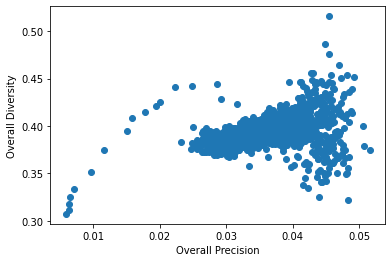

In [8]:
x = f1_f3_array[:, 0]
y = f1_f3_array[:, 1]
plt.scatter(x, y)
plt.xlabel('Overall Precision')
plt.ylabel('Overall Diversity')
plt.show()

In [9]:
def identify_pareto(array):
    # Count number of items
    population_size = array.shape[0]

    # Create a NumPy index for scores on the pareto front (zero indexed)
    population_ids = np.arange(population_size)

    # Create a starting list of items on the Pareto front
    # All items start off as being labelled as on the Parteo front
    pareto_front = np.ones(population_size, dtype=bool)
    
    # Loop through each item. This will then be compared with all other items
    for i in range(population_size):
        # Loop through all other items
        for j in range(population_size):
            # Check if our 'i' pint is dominated by out 'j' point
            if all(array[j] >= array[i]) and any(array[j] > array[i]):
                # j dominates i. Label 'i' point as not on Pareto front
                pareto_front[i] = 0
                # Stop further comparisons with 'i' (no more comparisons needed)
                break
    # Return ids of scenarios on pareto front
    return population_ids[pareto_front]

In [10]:
pareto = identify_pareto(f1_f3_array)
print ('Pareto front index vales')
print ('Points on Pareto front: \n',pareto)

pareto_front = f1_f3_array[pareto]
print ('\nPareto front scores')
print (pareto_front)

Pareto front index vales
Points on Pareto front: 
 [ 41  42  58  74  78  79 199]

Pareto front scores
[[0.0491992  0.45180061]
 [0.04552298 0.51570978]
 [0.05064258 0.39953304]
 [0.04814675 0.45397433]
 [0.05072253 0.3790734 ]
 [0.05165169 0.37515486]
 [0.04694238 0.46439141]]


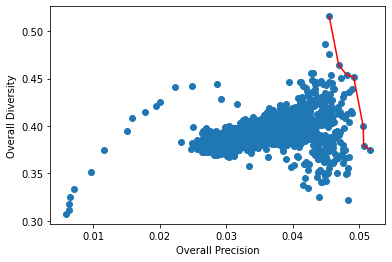

In [11]:
pareto_front_df = pd.DataFrame(pareto_front)
pareto_front_df.sort_values(0, inplace=True)
pareto_front = pareto_front_df.values

x_all = f1_f3_array[:, 0]
y_all = f1_f3_array[:, 1]
x_pareto = pareto_front[:, 0]
y_pareto = pareto_front[:, 1]

plt.scatter(x_all, y_all)
plt.plot(x_pareto, y_pareto, color='r')
plt.xlabel('Overall Precision')
plt.ylabel('Overall Diversity')
plt.show()

In [12]:
pareto = identify_pareto(f1_f2_array)
print ('Pareto front index vales')
print ('Points on Pareto front: \n',pareto)

pareto_front = f1_f2_array[pareto]
print ('\nPareto front scores')
print (pareto_front)

Pareto front index vales
Points on Pareto front: 
 [   0    1    3    4    5    6    7    8    9   10   11   12   13   14
   41   51   79  138  139  154  250  251  253  313  345  411 1065 1067
 1068 1121 1150 1222 1271 1272 1273 1293 1337 1347 1374 1404 1569 1588
 1599 1600 1788 1790 1791 1830 1867 1881 1926 1944]

Pareto front scores
[[0.00581015 5.57405249]
 [0.00640223 5.48660332]
 [0.00651543 5.29936612]
 [0.00711929 5.11350933]
 [0.00961849 4.73937925]
 [0.01157905 4.23755162]
 [0.01505454 3.72064232]
 [0.0158444  3.39789848]
 [0.01771617 3.18599649]
 [0.01936491 3.04942556]
 [0.02002937 2.8765938 ]
 [0.02236951 2.69203086]
 [0.02483083 2.4741623 ]
 [0.02866106 2.27143974]
 [0.0491992  1.34272316]
 [0.04900394 1.36157442]
 [0.05165169 1.33292752]
 [0.04857471 1.37917135]
 [0.04827215 1.3812466 ]
 [0.04820692 1.3854905 ]
 [0.04779747 1.48211119]
 [0.04768512 1.5147107 ]
 [0.04642058 1.55014868]
 [0.04570309 1.62323831]
 [0.04347195 1.67913128]
 [0.04327964 1.70357149]
 [0.04246579 

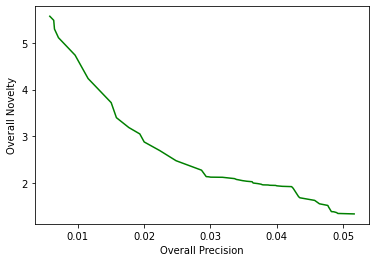

In [14]:
pareto_front_df = pd.DataFrame(pareto_front)
pareto_front_df.sort_values(0, inplace=True)
pareto_front = pareto_front_df.values

x_pareto = pareto_front[:, 0]
y_pareto = pareto_front[:, 1]

plt.plot(x_pareto, y_pareto, color='g')
plt.xlabel('Overall Precision')
plt.ylabel('Overall Novelty')
plt.show()